In [7]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

#load the MNIST dataset (handwritten digits 0-9)
(x_train, y_train), (_, _) = keras.datasets.mnist.load_data()

#Normalize the pixel values (0-255) to range (0-1)
x_train = x_train / 255.0

#Flatten the images (from 28x28 to 784 input features)
x_train = x_train.reshape(-1, 28*28)

In [9]:
model = keras.Sequential([
    keras.layers.Dense(120, activation='sigmoid', input_shape=(784,)),
    keras.layers.Dense(64, activation='sigmoid'), #Hidden Layer
    keras.layers.Dense(10, activation='sigmoid') # Output Layer (10 classes)
])

# Coompile the modal
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, 
          epochs=10, 
          batch_size=len(x_train),
          verbose=1)

predictions = model.predict(x_train)

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.0992 - loss: 2.4632
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step - accuracy: 0.0992 - loss: 2.4108
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step - accuracy: 0.0992 - loss: 2.3675
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step - accuracy: 0.0999 - loss: 2.3315
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step - accuracy: 0.1272 - loss: 2.3013
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step - accuracy: 0.3111 - loss: 2.2756
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step - accuracy: 0.3621 - loss: 2.2531
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step - accuracy: 0.3627 - loss: 2.2330
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step - accuracy: 0.3753 - loss: 2.2150
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step - accuracy: 0.3924 - loss: 2.1985
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


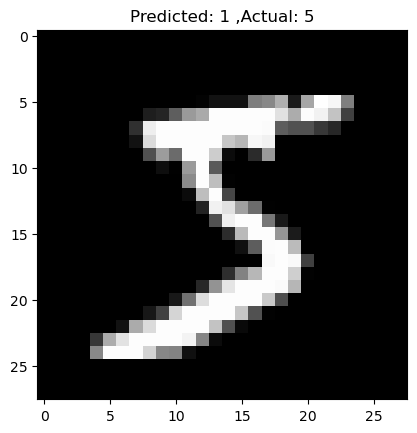

In [11]:
index = 0
plt.imshow(x_train[index].reshape(28, 28), cmap='gray')
plt.title(f'Predicted: {np.argmax(predictions[index])} ,Actual: {y_train[index]}')
plt.show()

In [16]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(
    x_train, y_train, test_size=0.2, random_state=42
)

model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(784,)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, 
                    epochs=5, 
                    batch_size=32,
                    validation_data=(X_test, y_test))

# Evaluate the model on test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"\nTest accuracy: {test_accuracy:.4f}")

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8408 - loss: 0.5280 - val_accuracy: 0.9532 - val_loss: 0.1483
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9534 - loss: 0.1571 - val_accuracy: 0.9664 - val_loss: 0.1136
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9660 - loss: 0.1101 - val_accuracy: 0.9686 - val_loss: 0.0992
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9717 - loss: 0.0915 - val_accuracy: 0.9715 - val_loss: 0.0935
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9743 - loss: 0.0774 - val_accuracy: 0.9748 - val_loss: 0.0820
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9747 - loss: 0.0797

Test accuracy: 0.9748
